FLOATING POINT SPACING ANALYSE

[1] GLOBAAL: ULP-groei bij toenemende magnitudes
----------------------------------------------------------------------


/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:57: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:57: UserWarning: Glyph 8309 (\N{SUPERSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/tristancools/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tristancools/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8309 (\N{SUPERSCRIPT FIVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


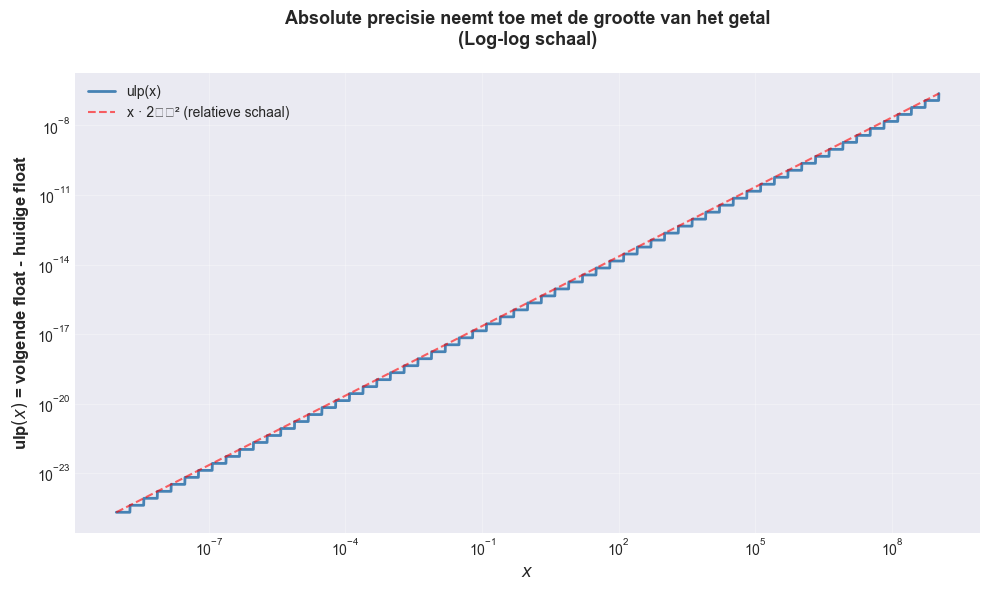


[2] RELATIEF PERSPECTIEF: Relatieve resolutie
----------------------------------------------------------------------


/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:84: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:84: UserWarning: Glyph 8309 (\N{SUPERSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()


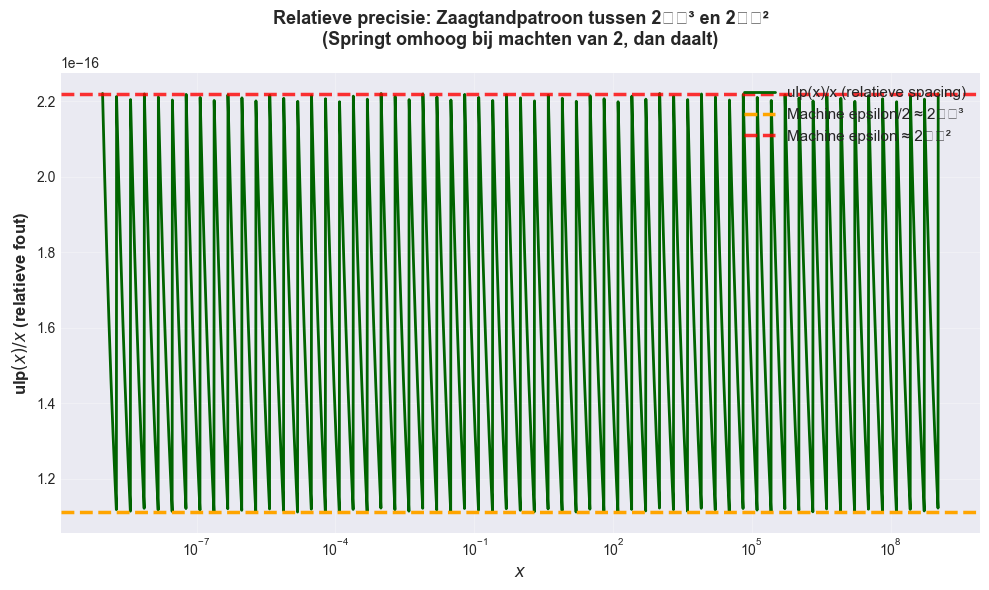


[3] LOKAAL PERSPECTIEF: Uniform gespreide floats in [1,2)
----------------------------------------------------------------------

Binnen [1,2) interval (eerste 2000 floats na 1.0):
  Spacing tussen floats (df):
    • min(df)  = 2.220e-16
    • max(df)  = 2.220e-16
    • df[0]    = 2.220e-16  (verwacht: 2⁻⁵² ≈ 2.220e-16)
  → Alle afstanden zijn IDENTIEK (uniform grid)

  Midpoints tussen floats:
    • min(dmid) = 0.000e+00
    • max(dmid) = 4.441e-16


/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:146: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/9s/8sbwt7bs0m15y39npx_sphrc0000gn/T/ipykernel_90093/3234751981.py:146: UserWarning: Glyph 8309 (\N{SUPERSCRIPT FIVE}) missing from font(s) Arial.
  plt.tight_layout()


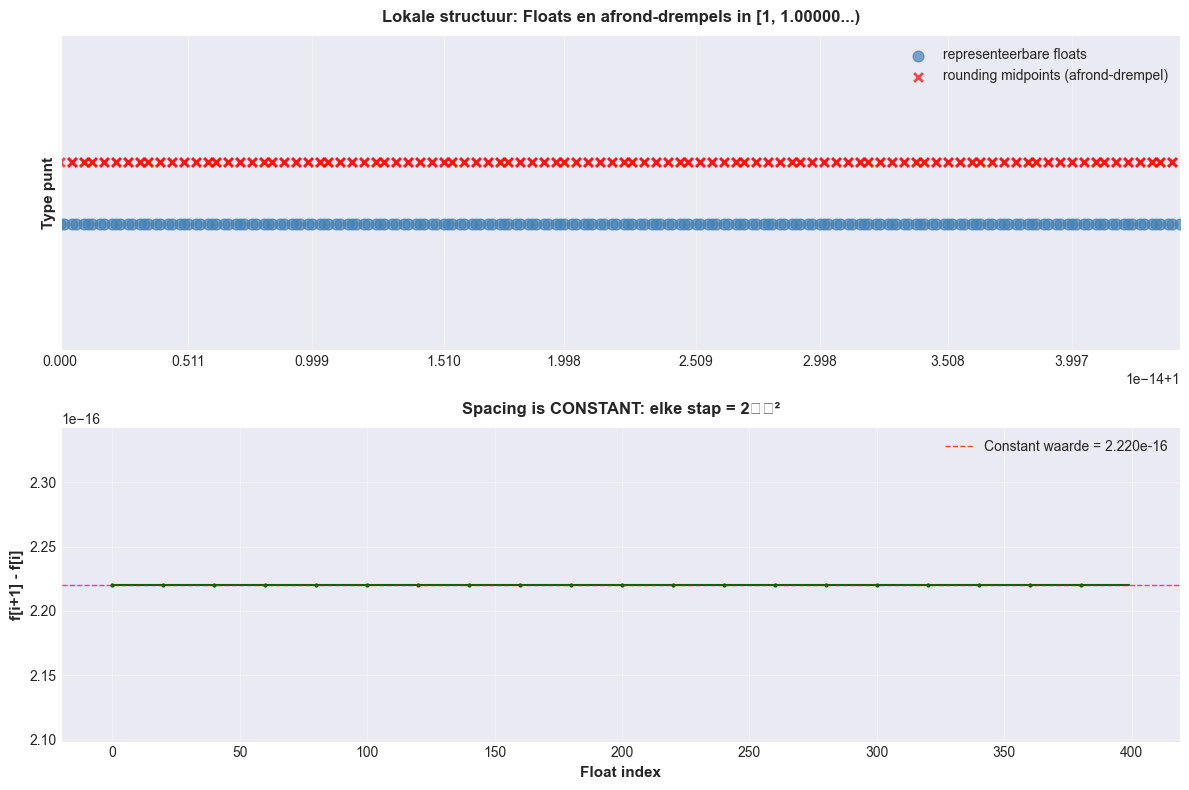


[4] DICHT BIJ NUL: Subnormale getallen
----------------------------------------------------------------------

De 2000 kleinste subnormale floats (anders dan normaal):
  Spacing tussen subnormals:
    • min(dsub) = 4.941e-324
    • max(dsub) = 4.941e-324
    • dsub[0]   = 4.941e-324  (constant!)
  → Spacing is GELIJK (niet afhankelijk van schaal)


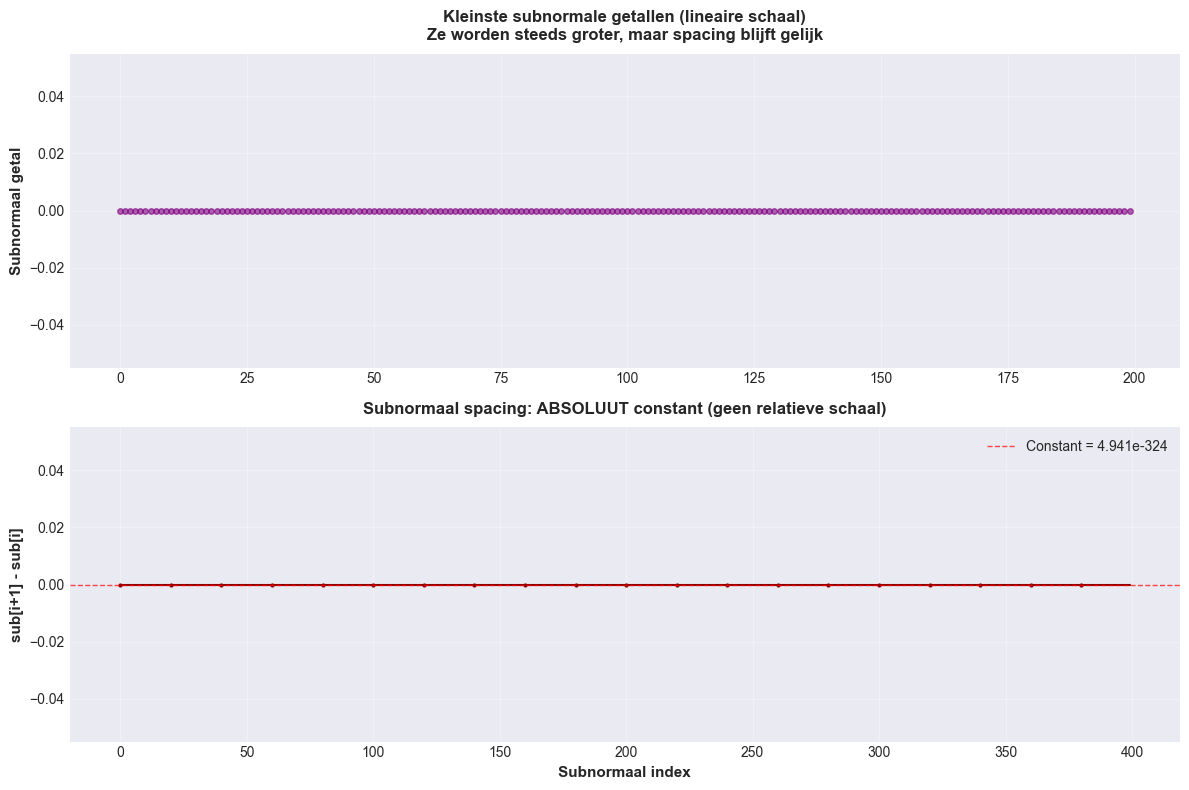


[5] KRITISCHE OVERGANG: Subnormaal ↔ Normaal
----------------------------------------------------------------------

Rond het kleinste normaliseerde getal (2⁻¹⁰²²):
  Normaal regime (2⁻¹⁰²²):
    • min_normal      = 2.225e-308
    • ulp(min_normal) = 4.941e-324
    • rel. resolutie  = 2.220e-16 = 2⁻⁵²

  Subnormaal regime (net eronder):
    • just_below      = 2.225e-308
    • ulp(just_below) = 4.941e-324
    • rel. resolutie  = 2.220e-16 (veel slechter!)

  → De relatieve resolutie VERSLECHTERT aanzienlijk bij subnormals!

SAMENVATTING

Float64 heeft DRIE verschillende spacing-regimes:

1. NORMAAL BEREIK (2⁻¹⁰²² tot 2¹⁰²³):
   • Relatieve spacingconstant: ulp(x)/x ≈ 2⁻⁵²
   • Absolute spacing groeit met x

2. SUBNORMAAL BEREIK (0 tot 2⁻¹⁰²²):
   • Absolute spacing constant
   • Relatieve resolutie verslechtert snel

3. BINADES:
   • Binnen elke "binade" [2^k, 2^(k+1)) zijn floats uniform verdeeld
   • Bij de volgende binade springt de spacing omhoog (factor 2)



In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Zet matplotlib in interactieve modus met betere styling
plt.style.use('seaborn-v0_8-darkgrid')

# ----------------------------
# Helpers: Hulpfuncties voor floating-point analyse
# ----------------------------
def ulp(x):
    """
    ULP = Unit in the Last Place
    Berekent de afstand naar het volgende representeerbare float64 getal
    (richting +∞).
    
    Dit is de absolute precisie van het getal x.
    """
    x = np.asarray(x, dtype=np.float64)
    return np.nextafter(x, np.inf) - x


def float64_from_bits(u):
    """
    Interpreteer uint64 bitpatronen als float64 waarden.
    Dit stelt ons in staat om exact de representatie van floats te begrijpen.
    """
    u = np.asarray(u, dtype=np.uint64)
    return u.view(np.float64)


# ----------------------------
# 1) GLOBAAL PERSPECTIEF: ulp(x) groei vs x (logaritmisch)
# ----------------------------
print("="*70)
print("FLOATING POINT SPACING ANALYSE")
print("="*70)
print("\n[1] GLOBAAL: ULP-groei bij toenemende magnitudes")
print("-"*70)

exponents = np.linspace(-30, 30, 4000)   # x van 2^-30 tot 2^30
x = (2.0 ** exponents).astype(np.float64)
u = ulp(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(x, u, linewidth=2, color='steelblue', label='ulp(x)')

# Voeg referentielijn toe: ulp(x) ≈ x · 2^-52 (machine epsilon schaal)
ref_line = x * (2.0 ** -52)
ax.loglog(x, ref_line, '--', linewidth=1.5, color='red', alpha=0.6, label='x · 2⁻⁵² (relatieve schaal)')

ax.set_xlabel(r'$x$', fontsize=12, fontweight='bold')
ax.set_ylabel(r'ulp$(x)$ = volgende float - huidige float', fontsize=12, fontweight='bold')
ax.set_title('Absolute precisie neemt toe met de grootte van het getal\n(Log-log schaal)', 
             fontsize=13, fontweight='bold', pad=20)
ax.grid(True, which="both", alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


# ----------------------------
# 2) RELATIEVE RESOLUTIE: ulp(x)/x (zaagtand-patroon per binade)
# ----------------------------
print("\n[2] RELATIEF PERSPECTIEF: Relatieve resolutie")
print("-"*70)

rel = u / x

fig, ax = plt.subplots(figsize=(10, 6))
ax.semilogx(x, rel, linewidth=2, color='darkgreen', label='ulp(x)/x (relatieve spacing)')

# Machine epsilon (halve ULP voor rounding)
epsilon = np.finfo(float).eps
ax.axhline(y=epsilon/2, color='orange', linestyle='--', linewidth=2.5, label=f'Machine epsilon/2 ≈ 2⁻⁵³')
ax.axhline(y=epsilon, color='red', linestyle='--', linewidth=2.5, alpha=0.8, label=f'Machine epsilon ≈ 2⁻⁵²')

ax.set_xlabel(r'$x$', fontsize=12, fontweight='bold')
ax.set_ylabel(r'ulp$(x) / x$ (relatieve fout)', fontsize=12, fontweight='bold')
ax.set_title('Relatieve precisie: Zaagtandpatroon tussen 2⁻⁵³ en 2⁻⁵²\n(Springt omhoog bij machten van 2, dan daalt)', 
             fontsize=13, fontweight='bold', pad=20)
# BELANGRIJK: LAAT DE Y-LIMIET AUTOMATISCH INGESTELD (dit laat de data goed zien!)
ax.grid(True, which="both", alpha=0.3)
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.show()


# ----------------------------
# 3) LOKALE STRUCTUUR: Uniforme spacing binnen [1,2) interval
# ----------------------------
print("\n[3] LOKAAL PERSPECTIEF: Uniform gespreide floats in [1,2)")
print("-"*70)

N = 2000  # neem 2000 opeenvolgende floats vanaf 1.0

bits_start = np.uint64(0x3ff0000000000000)      # bitvorm van 1.0
bits = bits_start + np.arange(N, dtype=np.uint64)
f = float64_from_bits(bits)                      # floats: 1.0, next, next, ...

df = np.diff(f)                                  # afstanden tussen opeenvolgende floats
mid = 0.5 * (f[:-1] + f[1:])                     # rounding midpoints (waar afronden omslaat)
dmid = np.diff(mid)

print(f"\nBinnen [1,2) interval (eerste {N} floats na 1.0):")
print(f"  Spacing tussen floats (df):")
print(f"    • min(df)  = {df.min():.3e}")
print(f"    • max(df)  = {df.max():.3e}")
print(f"    • df[0]    = {df[0]:.3e}  (verwacht: 2⁻⁵² ≈ {2.0**-52:.3e})")
print(f"  → Alle afstanden zijn IDENTIEK (uniform grid)")
print(f"\n  Midpoints tussen floats:")
print(f"    • min(dmid) = {dmid.min():.3e}")
print(f"    • max(dmid) = {dmid.max():.3e}")

# Visualiseer lokale structuur met veel detail
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Floats en rounding points
ax = axes[0]
ax.scatter(f[:200], np.zeros(200), s=60, marker='o', color='steelblue', 
          alpha=0.7, label='representeerbare floats', zorder=3)
ax.scatter(mid[:199], np.zeros(199) + 0.05, s=40, marker='x', color='red', 
          linewidth=2, alpha=0.7, label='rounding midpoints (afrond-drempel)', zorder=3)

ax.set_xlim([f[0], f[199]])
ax.set_ylim([-0.1, 0.15])
ax.set_ylabel('Type punt', fontsize=11, fontweight='bold')
ax.set_title('Lokale structuur: Floats en afrond-drempels in [1, 1.00000...)',
            fontsize=12, fontweight='bold', pad=10)
ax.set_yticks([])
ax.grid(True, alpha=0.3, axis='x')
ax.legend(fontsize=10, loc='upper right')

# Plot 2: Constant spacing
ax = axes[1]
ax.plot(df[:400], linewidth=1.5, color='darkgreen', marker='o', 
       markersize=2, markevery=20)
ax.set_xlabel('Float index', fontsize=11, fontweight='bold')
ax.set_ylabel('f[i+1] - f[i]', fontsize=11, fontweight='bold')
ax.set_title('Spacing is CONSTANT: elke stap = 2⁻⁵²', 
            fontsize=12, fontweight='bold', pad=10)
ax.grid(True, alpha=0.3)
ax.axhline(y=df[0], color='red', linestyle='--', linewidth=1, 
          label=f'Constant waarde = {df[0]:.3e}', alpha=0.7)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


# ----------------------------
# 4) SUBNORMALS: Constante absolute stap dicht bij nul
# ----------------------------
print("\n[4] DICHT BIJ NUL: Subnormale getallen")
print("-"*70)

M = 2000
sub_bits = np.arange(1, M + 1, dtype=np.uint64)  # kleinste subnormals (bits = 1, 2, 3, ...)
sub = float64_from_bits(sub_bits)
dsub = np.diff(sub)

print(f"\nDe {M} kleinste subnormale floats (anders dan normaal):")
print(f"  Spacing tussen subnormals:")
print(f"    • min(dsub) = {dsub.min():.3e}")
print(f"    • max(dsub) = {dsub.max():.3e}")
print(f"    • dsub[0]   = {dsub[0]:.3e}  (constant!)")
print(f"  → Spacing is GELIJK (niet afhankelijk van schaal)")

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Waarden zelf
ax = axes[0]
ax.plot(sub[:200], marker='o', linestyle='None', markersize=4, 
       color='purple', alpha=0.6)
ax.set_ylabel('Subnormaal getal', fontsize=11, fontweight='bold')
ax.set_title('Kleinste subnormale getallen (lineaire schaal)\nZe worden steeds groter, maar spacing blijft gelijk',
            fontsize=12, fontweight='bold', pad=10)
ax.grid(True, alpha=0.3)

# Plot 2: Spacing
ax = axes[1]
ax.plot(dsub[:400], linewidth=1.5, color='darkred', marker='o',
       markersize=2, markevery=20)
ax.set_xlabel('Subnormaal index', fontsize=11, fontweight='bold')
ax.set_ylabel('sub[i+1] - sub[i]', fontsize=11, fontweight='bold')
ax.set_title('Subnormaal spacing: ABSOLUUT constant (geen relatieve schaal)',
            fontsize=12, fontweight='bold', pad=10)
ax.axhline(y=dsub[0], color='red', linestyle='--', linewidth=1,
          label=f'Constant = {dsub[0]:.3e}', alpha=0.7)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


# ----------------------------
# 5) KRITISCH PUNT: Overgang subnormaal → normaal
# ----------------------------
print("\n[5] KRITISCHE OVERGANG: Subnormaal ↔ Normaal")
print("-"*70)

min_normal = np.float64(2.0 ** -1022)
just_below = np.nextafter(min_normal, 0.0)

print(f"\nRond het kleinste normaliseerde getal (2⁻¹⁰²²):")
print(f"  Normaal regime (2⁻¹⁰²²):")
print(f"    • min_normal      = {min_normal:.3e}")
print(f"    • ulp(min_normal) = {ulp(min_normal):.3e}")
print(f"    • rel. resolutie  = {ulp(min_normal)/min_normal:.3e} = 2⁻⁵²")
print(f"\n  Subnormaal regime (net eronder):")
print(f"    • just_below      = {just_below:.3e}")
print(f"    • ulp(just_below) = {ulp(just_below):.3e}")
print(f"    • rel. resolutie  = {ulp(just_below)/just_below:.3e} (veel slechter!)")
print(f"\n  → De relatieve resolutie VERSLECHTERT aanzienlijk bij subnormals!")

print("\n" + "="*70)
print("SAMENVATTING")
print("="*70)
print("""
Float64 heeft DRIE verschillende spacing-regimes:

1. NORMAAL BEREIK (2⁻¹⁰²² tot 2¹⁰²³):
   • Relatieve spacingconstant: ulp(x)/x ≈ 2⁻⁵²
   • Absolute spacing groeit met x

2. SUBNORMAAL BEREIK (0 tot 2⁻¹⁰²²):
   • Absolute spacing constant
   • Relatieve resolutie verslechtert snel

3. BINADES:
   • Binnen elke "binade" [2^k, 2^(k+1)) zijn floats uniform verdeeld
   • Bij de volgende binade springt de spacing omhoog (factor 2)
""")

Gemiddelde spacing van de GESAMPLEDE punten (dus step_bits ulp's):
  in [1,2): 0.0009765625
  in [2,4): 0.001953125
  in [4,8): 0.00390625
Verhoudingen (moeten ~2x per sprong zijn):
  [2,4)/[1,2) = 2.0
  [4,8)/[2,4) = 2.0


/Users/tristancools/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8658 (\N{RIGHTWARDS DOUBLE ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


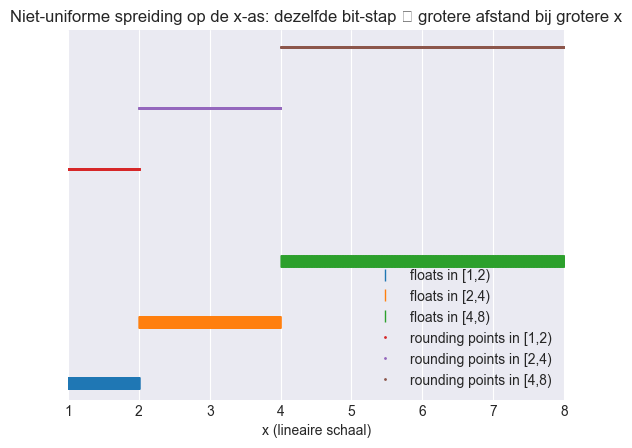

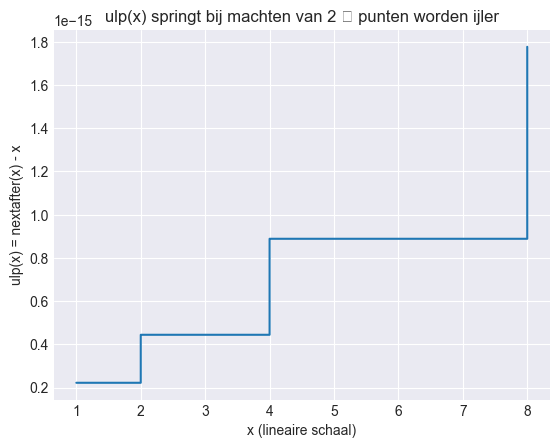

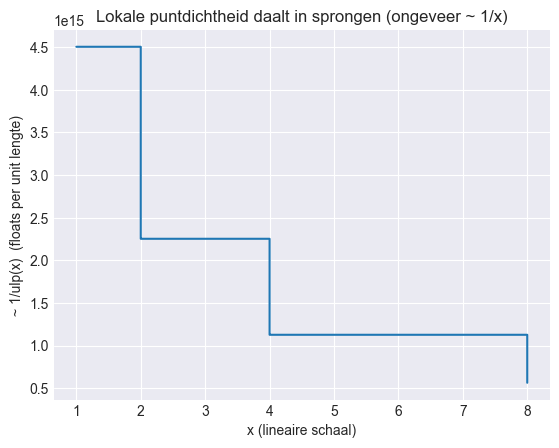


Subnormals:
  dsub[0] = 5e-324  (zou constant moeten zijn)
  min(dsub), max(dsub) = 5e-324 5e-324


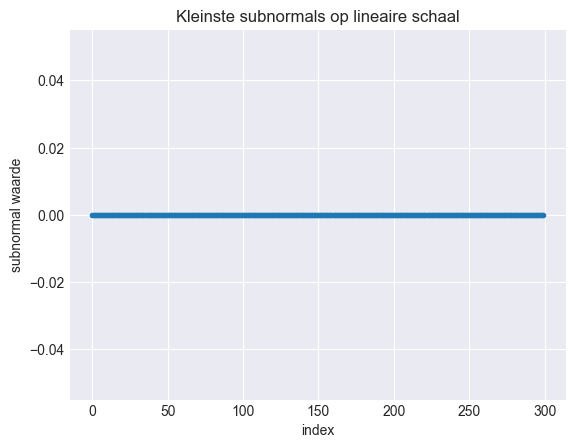

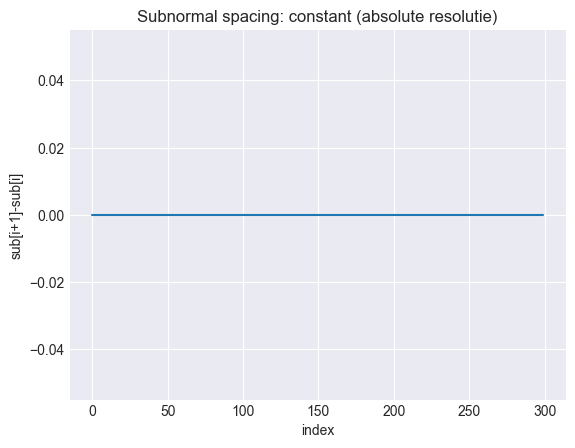

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def float64_from_bits(u):
    """Interpreteer uint64 bitpatronen als float64."""
    u = np.asarray(u, dtype=np.uint64)
    return u.view(np.float64)


def bits_of_float(x):
    """Geef uint64 bitpatroon van een float64."""
    return np.float64(x).view(np.uint64)


def sample_binade(start_value, step_bits=1<<42):
    """
    Sample representabele float64's in één binade [2^e, 2^(e+1))
    door constant te stappen in mantissa-bitruimte.

    - start_value moet exact 2^e zijn (bv 1.0, 2.0, 4.0, ...)
    - step_bits bepaalt hoe grof je downsamplet.
    """
    start_bits = bits_of_float(start_value)

    # In één binade lopen de 52 mantissa-bits door: 0 ... (2^52 - 1)
    mantissa_range = (1 << 52)
    offsets = np.arange(0, mantissa_range, step_bits, dtype=np.uint64)

    vals = float64_from_bits(start_bits + offsets)
    return vals


def ulp(x):
    x = np.asarray(x, dtype=np.float64)
    return np.nextafter(x, np.inf) - x


# ---------------------------------------------------------------------
# 1) "Rug plot" op LINEAIRE x-as: punten worden zichtbaar ijler met x
# ---------------------------------------------------------------------
step_bits = 1 << 42  # ~1024 punten per binade (want 2^52 / 2^42 = 2^10)

f1 = sample_binade(1.0, step_bits=step_bits)  # [1,2)
f2 = sample_binade(2.0, step_bits=step_bits)  # [2,4)
f4 = sample_binade(4.0, step_bits=step_bits)  # [4,8)

# rounding points = midpoints tussen opeenvolgende representabele floats
m1 = 0.5 * (f1[:-1] + f1[1:])
m2 = 0.5 * (f2[:-1] + f2[1:])
m4 = 0.5 * (f4[:-1] + f4[1:])

# Toon ook de (gemiddelde) spacing van de gesamplede punten
print("Gemiddelde spacing van de GESAMPLEDE punten (dus step_bits ulp's):")
print("  in [1,2):", np.mean(np.diff(f1)))
print("  in [2,4):", np.mean(np.diff(f2)))
print("  in [4,8):", np.mean(np.diff(f4)))
print("Verhoudingen (moeten ~2x per sprong zijn):")
print("  [2,4)/[1,2) =", np.mean(np.diff(f2)) / np.mean(np.diff(f1)))
print("  [4,8)/[2,4) =", np.mean(np.diff(f4)) / np.mean(np.diff(f2)))

plt.figure()
plt.plot(f1, 0.00*np.ones_like(f1), "|", markersize=8, label="floats in [1,2)")
plt.plot(f2, 0.10*np.ones_like(f2), "|", markersize=8, label="floats in [2,4)")
plt.plot(f4, 0.20*np.ones_like(f4), "|", markersize=8, label="floats in [4,8)")

plt.plot(m1, 0.35*np.ones_like(m1), ".", markersize=2, label="rounding points in [1,2)")
plt.plot(m2, 0.45*np.ones_like(m2), ".", markersize=2, label="rounding points in [2,4)")
plt.plot(m4, 0.55*np.ones_like(m4), ".", markersize=2, label="rounding points in [4,8)")

plt.yticks([])
plt.xlim(1, 8)
plt.xlabel("x (lineaire schaal)")
plt.title("Niet-uniforme spreiding op de x-as: dezelfde bit-stap ⇒ grotere afstand bij grotere x")
plt.grid(True)
plt.legend()
plt.show()


# ---------------------------------------------------------------------
# 2) ULP als stapfunctie op lineaire x-as (dit is de lokale 'dichtheid')
# ---------------------------------------------------------------------
x = np.linspace(1.0, 8.0, 20000).astype(np.float64)
u = ulp(x)

plt.figure()
plt.step(x, u, where="post")
plt.xlabel("x (lineaire schaal)")
plt.ylabel("ulp(x) = nextafter(x) - x")
plt.title("ulp(x) springt bij machten van 2 ⇒ punten worden ijler")
plt.grid(True)
plt.show()


# ---------------------------------------------------------------------
# 3) Dichtheid ~ 1/ulp(x): hoeveel floats per eenheid lengte (lineair)
# ---------------------------------------------------------------------
density = 1.0 / u

plt.figure()
plt.step(x, density, where="post")
plt.xlabel("x (lineaire schaal)")
plt.ylabel("~ 1/ulp(x)  (floats per unit lengte)")
plt.title("Lokale puntdichtheid daalt in sprongen (ongeveer ~ 1/x)")
plt.grid(True)
plt.show()


# ---------------------------------------------------------------------
# 4) Subnormals: constant absolute spacing dicht bij 0
# ---------------------------------------------------------------------
M = 2000
sub_bits = np.arange(1, M + 1, dtype=np.uint64)  # kleinste subnormals
sub = float64_from_bits(sub_bits)
dsub = np.diff(sub)

print("\nSubnormals:")
print("  dsub[0] =", dsub[0], " (zou constant moeten zijn)")
print("  min(dsub), max(dsub) =", dsub.min(), dsub.max())

plt.figure()
plt.plot(sub[:300], marker="o", linestyle="None", markersize=3)
plt.xlabel("index")
plt.ylabel("subnormal waarde")
plt.title("Kleinste subnormals op lineaire schaal")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(dsub[:300])
plt.xlabel("index")
plt.ylabel("sub[i+1]-sub[i]")
plt.title("Subnormal spacing: constant (absolute resolutie)")
plt.grid(True)
plt.show()
